In [1]:
#importing all the important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import datetime

In [2]:
#read the excel file
data=pd.read_excel("sales_data.xlsx")

In [3]:
#head gives top 5 rows
data.head()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE,Unnamed: 40,Unnamed: 41
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,12,61,37,14,1067.92,5674.65,3916.53,1327.44,NaN,NaN
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,1,13,24,44,30.25,3143.69,2205.47,5646.55,NaN,33340.77
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,0,6,12,25,0.00,707.98,2560.91,3990.80,NaN,NaN
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,0,10,13,21,0.00,1908.99,2025.05,3058.23,NaN,NaN
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,6,9,27,13,501.34,1197.83,3004.77,1559.50,NaN,NaN


In [5]:
#info describe about the type of datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CustomerID                 5000 non-null   int64         
 1   TOTAL_ORDERS               5000 non-null   int64         
 2   REVENUE                    5000 non-null   float64       
 3   AVERAGE_ORDER_VALUE        5000 non-null   float64       
 4   CARRIAGE_REVENUE           5000 non-null   float64       
 5   AVERAGESHIPPING            5000 non-null   float64       
 6   FIRST_ORDER_DATE           5000 non-null   datetime64[ns]
 7   LATEST_ORDER_DATE          5000 non-null   datetime64[ns]
 8   AVGDAYSBETWEENORDERS       5000 non-null   float64       
 9   DAYSSINCELASTORDER         5000 non-null   int64         
 10  MONDAY_ORDERS              5000 non-null   int64         
 11  TUESDAY_ORDERS             5000 non-null   int64         
 12  WEDNES

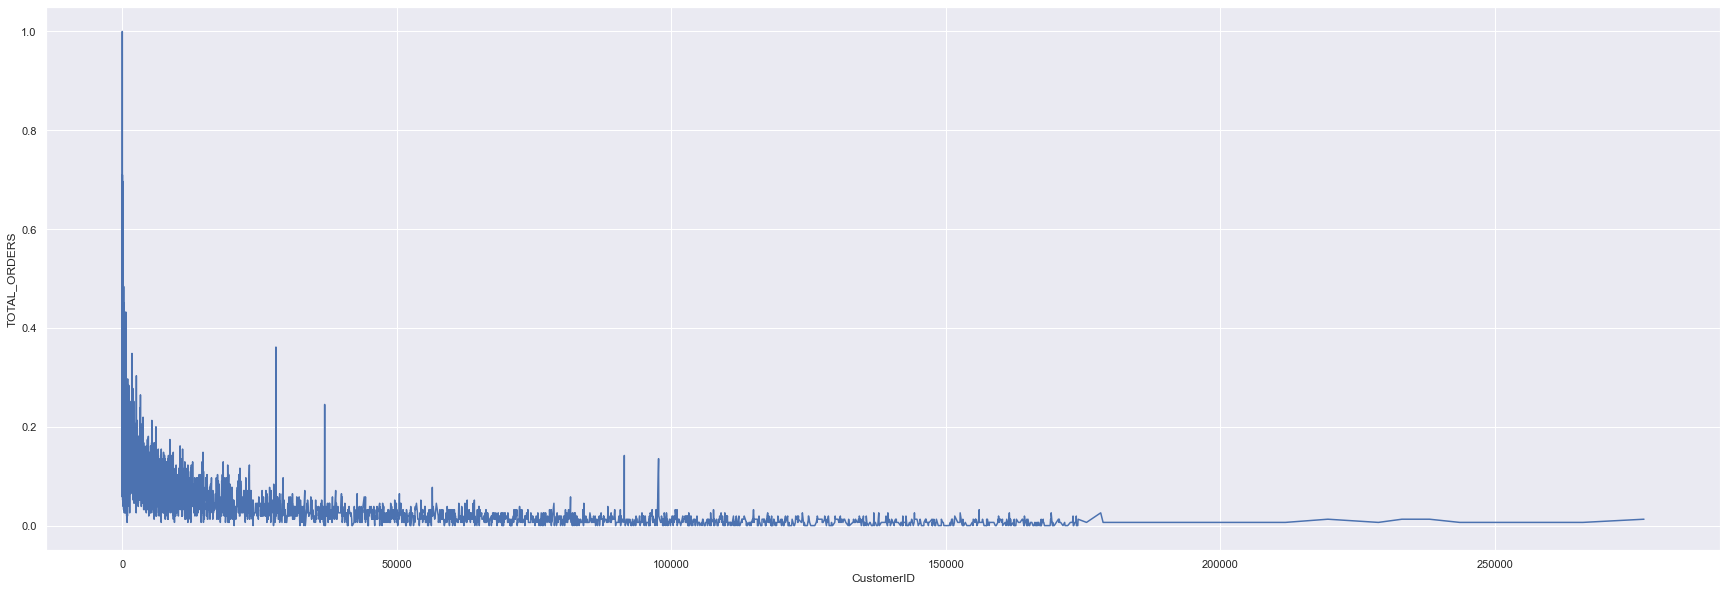

In [62]:
#this graph tells about the customerID and its total order
sns.set(rc={"figure.figsize":(30, 10)})
sns.lineplot(x='CustomerID',y='TOTAL_ORDERS',data=data,ci=None)

In [8]:
#shape tells about the how many rows and column 
data.shape

(5000, 42)

In [9]:
#describe tells about the statistic value
data.describe()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,...,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE,Unnamed: 40,Unnamed: 41
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,0.0,1.00
mean,40709.227800,12.87040,1681.523840,136.537378,46.036376,3.592574,163.159618,87.420000,1.629000,1.75440,...,1.028800,3.746200,4.434000,3.661400,131.062636,486.863868,584.731626,478.865710,NaN,33340.77
std,49949.848017,12.67988,1998.618678,91.651569,47.879226,2.021360,259.699496,80.156513,2.236506,2.43394,...,2.174331,4.700234,5.044793,4.581894,331.289349,789.029911,804.290026,743.244248,NaN,NaN
min,1.000000,1.00000,38.500000,10.680000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,33340.77
25%,1687.500000,3.00000,315.097500,83.025000,9.980000,2.500000,21.670000,7.000000,0.000000,0.00000,...,0.000000,1.000000,1.000000,1.000000,0.000000,35.000000,89.990000,1.000000,NaN,33340.77
50%,13765.000000,8.00000,966.725000,113.160000,24.985000,3.660000,57.635000,68.000000,1.000000,1.00000,...,0.000000,2.000000,3.000000,2.000000,0.000000,236.440000,299.840000,208.990000,NaN,33340.77
75%,71891.500000,20.00000,2493.072500,160.272500,76.862500,4.790000,170.357500,171.250000,2.000000,3.00000,...,1.000000,6.000000,7.000000,5.000000,131.282500,661.952500,797.032500,620.117500,NaN,33340.77
max,277160.000000,156.00000,34847.400000,1578.880000,529.590000,35.990000,1409.500000,207.000000,19.000000,23.00000,...,34.000000,61.000000,58.000000,64.000000,7700.240000,23832.770000,17749.010000,12995.020000,NaN,33340.77


In [10]:
#tail gives top last 5 colmn
data.tail()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE,Unnamed: 40,Unnamed: 41
4995,173946,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.0,207,...,0,0,0,1,0.0,0.0,0.00,117.49,NaN,NaN
4996,173987,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.0,207,...,0,0,0,1,0.0,0.0,0.00,117.49,NaN,NaN
4997,174004,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.0,207,...,0,0,0,1,0.0,0.0,0.00,117.49,NaN,NaN
4998,174038,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.0,207,...,0,0,1,0,0.0,0.0,117.49,0.00,NaN,NaN
4999,200783,2,94.14,47.07,9.94,4.97,2014-06-26,2021-04-01,1235.5,207,...,0,0,1,1,0.0,0.0,44.19,49.95,NaN,NaN


In [11]:
#columns tells about the total columns present in those excel
data.columns

Index(['CustomerID', 'TOTAL_ORDERS', 'REVENUE', 'AVERAGE_ORDER_VALUE',
       'CARRIAGE_REVENUE', 'AVERAGESHIPPING', 'FIRST_ORDER_DATE',
       'LATEST_ORDER_DATE', 'AVGDAYSBETWEENORDERS', 'DAYSSINCELASTORDER',
       'MONDAY_ORDERS', 'TUESDAY_ORDERS', 'WEDNESDAY_ORDERS',
       'THURSDAY_ORDERS', 'FRIDAY_ORDERS', 'SATURDAY_ORDERS', 'SUNDAY_ORDERS',
       'MONDAY_REVENUE', 'TUESDAY_REVENUE', 'WEDNESDAY_REVENUE',
       'THURSDAY_REVENUE', 'FRIDAY_REVENUE', 'SATURDAY_REVENUE',
       'SUNDAY_REVENUE', 'WEEK1_DAY01_DAY07_ORDERS',
       'WEEK2_DAY08_DAY15_ORDERS', 'WEEK3_DAY16_DAY23_ORDERS',
       'WEEK4_DAY24_DAY31_ORDERS', 'WEEK1_DAY01_DAY07_REVENUE',
       'WEEK2_DAY08_DAY15_REVENUE', 'WEEK3_DAY16_DAY23_REVENUE',
       'WEEK4_DAY24_DAY31_REVENUE', 'TIME_0000_0600_ORDERS',
       'TIME_0601_1200_ORDERS', 'TIME_1200_1800_ORDERS',
       'TIME_1801_2359_ORDERS', 'TIME_0000_0600_REVENUE',
       'TIME_0601_1200_REVENUE', 'TIME_1200_1800_REVENUE',
       'TIME_1801_2359_REVENUE', 'Unna

In [12]:
#isnull tells about the any null vaue present or not in the given data sum() is used for sum the null value
#if any null value present in data we have to remove it .
data.isnull().sum()

CustomerID                      0
TOTAL_ORDERS                    0
REVENUE                         0
AVERAGE_ORDER_VALUE             0
CARRIAGE_REVENUE                0
AVERAGESHIPPING                 0
FIRST_ORDER_DATE                0
LATEST_ORDER_DATE               0
AVGDAYSBETWEENORDERS            0
DAYSSINCELASTORDER              0
MONDAY_ORDERS                   0
TUESDAY_ORDERS                  0
WEDNESDAY_ORDERS                0
THURSDAY_ORDERS                 0
FRIDAY_ORDERS                   0
SATURDAY_ORDERS                 0
SUNDAY_ORDERS                   0
MONDAY_REVENUE                  0
TUESDAY_REVENUE                 0
WEDNESDAY_REVENUE               0
THURSDAY_REVENUE                0
FRIDAY_REVENUE                  0
SATURDAY_REVENUE                0
SUNDAY_REVENUE                  0
WEEK1_DAY01_DAY07_ORDERS        0
WEEK2_DAY08_DAY15_ORDERS        0
WEEK3_DAY16_DAY23_ORDERS        0
WEEK4_DAY24_DAY31_ORDERS        0
WEEK1_DAY01_DAY07_REVENUE       0
WEEK2_DAY08_DA

In [13]:
#its tells about the value in the boolean value
data.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [44]:
#unique its tell about the total value present in the each attributes
data.nunique()

CustomerID                   5000
TOTAL_ORDERS                   85
REVENUE                      4635
AVERAGE_ORDER_VALUE          4113
CARRIAGE_REVENUE             1175
AVERAGESHIPPING               567
FIRST_ORDER_DATE             1928
LATEST_ORDER_DATE             207
AVGDAYSBETWEENORDERS         3563
DAYSSINCELASTORDER            207
MONDAY_ORDERS                  19
TUESDAY_ORDERS                 22
WEDNESDAY_ORDERS               22
THURSDAY_ORDERS                23
FRIDAY_ORDERS                  24
SATURDAY_ORDERS                24
SUNDAY_ORDERS                  23
MONDAY_REVENUE               2151
TUESDAY_REVENUE              2201
WEDNESDAY_REVENUE            2262
THURSDAY_REVENUE             2582
FRIDAY_REVENUE               2378
SATURDAY_REVENUE             2149
SUNDAY_REVENUE               2573
WEEK1_DAY01_DAY07_ORDERS       27
WEEK2_DAY08_DAY15_ORDERS       34
WEEK3_DAY16_DAY23_ORDERS       33
WEEK4_DAY24_DAY31_ORDERS       32
WEEK1_DAY01_DAY07_REVENUE    3026
WEEK2_DAY08_DA

In [15]:
#this table tells about the order history on the basic of the daly day basic
data1= data[['MONDAY_ORDERS' ,'TUESDAY_ORDERS' ,'WEDNESDAY_ORDERS', 'THURSDAY_ORDERS', 'FRIDAY_ORDERS' ,'SATURDAY_ORDERS', 'SUNDAY_ORDERS']]
data1

,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,THURSDAY_ORDERS,FRIDAY_ORDERS,SATURDAY_ORDERS,SUNDAY_ORDERS
0,13,13,29,25,19,15,10
1,11,13,10,13,14,10,11
2,5,4,3,5,5,8,13
3,10,8,5,8,5,3,5
4,2,3,8,8,12,10,12
...,...,...,...,...,...,...,...
4995,0,0,0,1,0,0,0
4996,0,0,0,1,0,0,0
4997,0,0,0,1,0,0,0
4998,0,0,0,1,0,0,0


In [16]:
#sum is used for sum the all the values 
data1.sum()

MONDAY_ORDERS        8145
TUESDAY_ORDERS       8772
WEDNESDAY_ORDERS     8990
THURSDAY_ORDERS     10670
FRIDAY_ORDERS        9731
SATURDAY_ORDERS      8417
SUNDAY_ORDERS        9627
dtype: int64

In [49]:
#counts is used for count the values present on that table
data1.value_counts

<bound method DataFrame.value_counts of       CustomerID  TOTAL_ORDERS   REVENUE  AVERAGE_ORDER_VALUE  \
46          2016      0.051613  0.065760               258.61   
53          2777      0.045161  0.057052               253.05   
54          2858      0.058065  0.056468               200.41   
59          3122      0.051613  0.054195               213.88   
62          3202      0.051613  0.053625               211.68   
...          ...           ...       ...                  ...   
4995      173946      0.000000  0.002269               117.49   
4996      173987      0.000000  0.002269               117.49   
4997      174004      0.000000  0.002269               117.49   
4998      174038      0.000000  0.002269               117.49   
4999      200783      0.006452  0.001598                47.07   

      CARRIAGE_REVENUE  AVERAGESHIPPING FIRST_ORDER_DATE LATEST_ORDER_DATE  \
46                9.98             1.11       2021-05-18        2021-10-24   
53               43.93 

In [18]:
#this table tells about the saturday order vs saturday revenue 
data2=data[['SATURDAY_ORDERS','SATURDAY_REVENUE']]
data2

,SATURDAY_ORDERS,SATURDAY_REVENUE
0,15,1496.33
1,10,1624.34
2,8,1223.96
3,3,630.00
4,10,956.56
...,...,...
4995,0,0.00
4996,0,0.00
4997,0,0.00
4998,0,0.00


(array([2884.,  559.,  503.,  442.,  285.,  234.,   73.,   10.,    7.,
           3.]),
 array([1.000000e+00, 2.771690e+04, 5.543280e+04, 8.314870e+04,
        1.108646e+05, 1.385805e+05, 1.662964e+05, 1.940123e+05,
        2.217282e+05, 2.494441e+05, 2.771600e+05]),
 <a list of 10 Patch objects>)

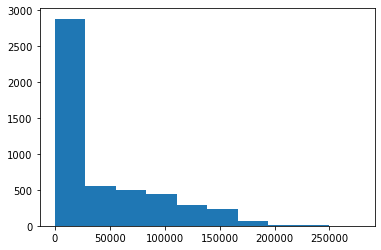

In [19]:
#this graph tells about the CustomerID
plt.hist(data['CustomerID'])

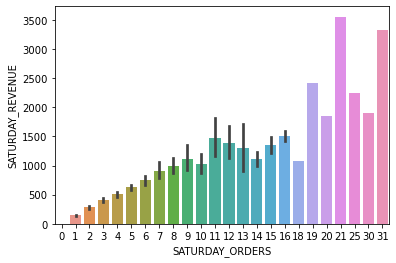

In [20]:
#this graph tells about the Saturday order vs Saturday revenue
sns.barplot(data=data,x="SATURDAY_ORDERS",y="SATURDAY_REVENUE")

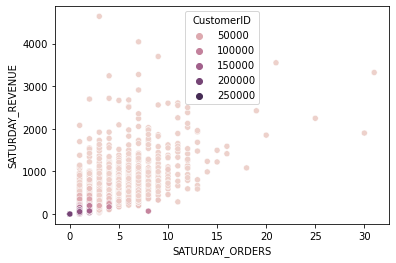

In [21]:
#this graph tells about the Saturday order vs Saturday revenue in the term of customerID
#and also tells about which customerID whose do more shopping and generate more revenue
sns.scatterplot(data=data,x="SATURDAY_ORDERS",y="SATURDAY_REVENUE",hue="CustomerID")

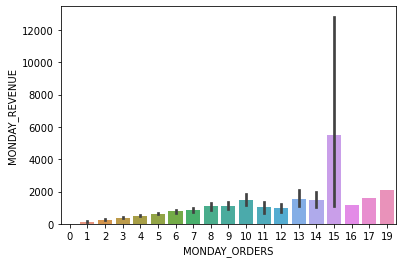

In [22]:
#this graph tells about the Monday order vs Monday revenue
sns.barplot(data=data,x="MONDAY_ORDERS",y="MONDAY_REVENUE")

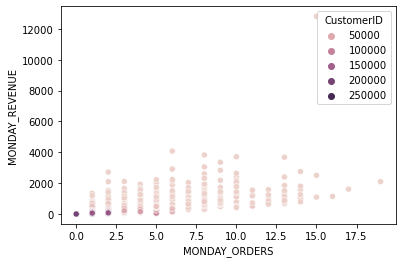

In [23]:
#this graph tells about the Monday order vs Monday revenue in the term of customerID
#and also tells about which customerID whose do more shopping and generate more revenue
sns.scatterplot(data=data,x="MONDAY_ORDERS",y="MONDAY_REVENUE",hue="CustomerID")

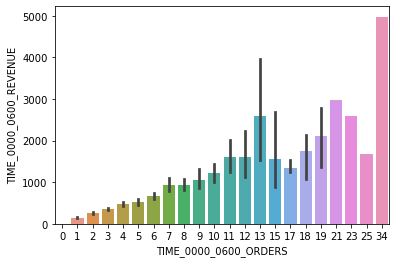

In [24]:
#this graph tells about the which time the user do more order and generate more revenue
sns.barplot(data=data,x="TIME_0000_0600_ORDERS",y="TIME_0000_0600_REVENUE")

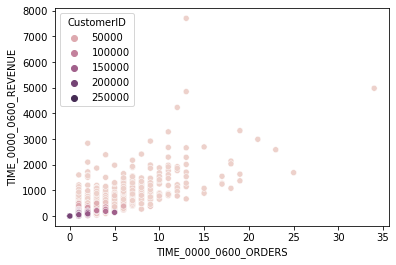

In [25]:
#this graph tells about the which time the user do more order and generate more revenue in term of CustomerID
sns.scatterplot(data=data,x="TIME_0000_0600_ORDERS",y="TIME_0000_0600_REVENUE",hue="CustomerID")

C:\Users\anand\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of REVENUE')

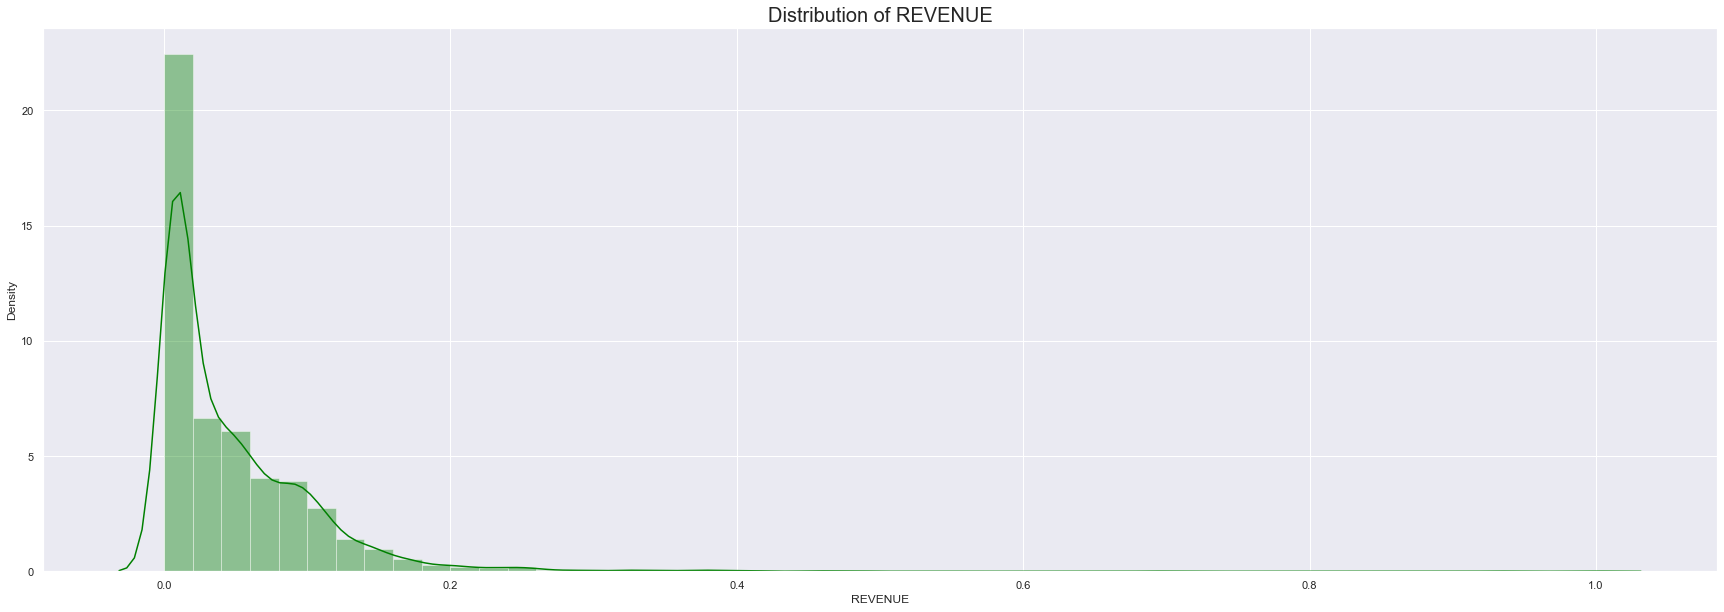

In [82]:
#this graph tells about the Distribution of revenue
sns.set(rc={"figure.figsize":(30, 10)})
sns.distplot(data['REVENUE'], color = 'green')
plt.title("Distribution of REVENUE", fontsize = 20)

In [88]:
#working on customer segmentation by using k means on Revenue and Total_orders
x=data.iloc[:,[3,2]].values


In [89]:
print(x)

[[9.66700000e+01 3.43246698e-01]
 [1.34460000e+02 3.15650882e-01]
 [1.68830000e+02 2.07452404e-01]
 ...
 [1.17490000e+02 2.26924723e-03]
 [1.17490000e+02 2.26924723e-03]
 [4.70700000e+01 1.59844178e-03]]


In [90]:
#we used K-means Clustering Algorithm in our project because in our project we have many attributes are some of the attributes are interconnected and some of the depend upon another attributes
KMEANS = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x)
  KMEANS.append(kmeans.inertia_)

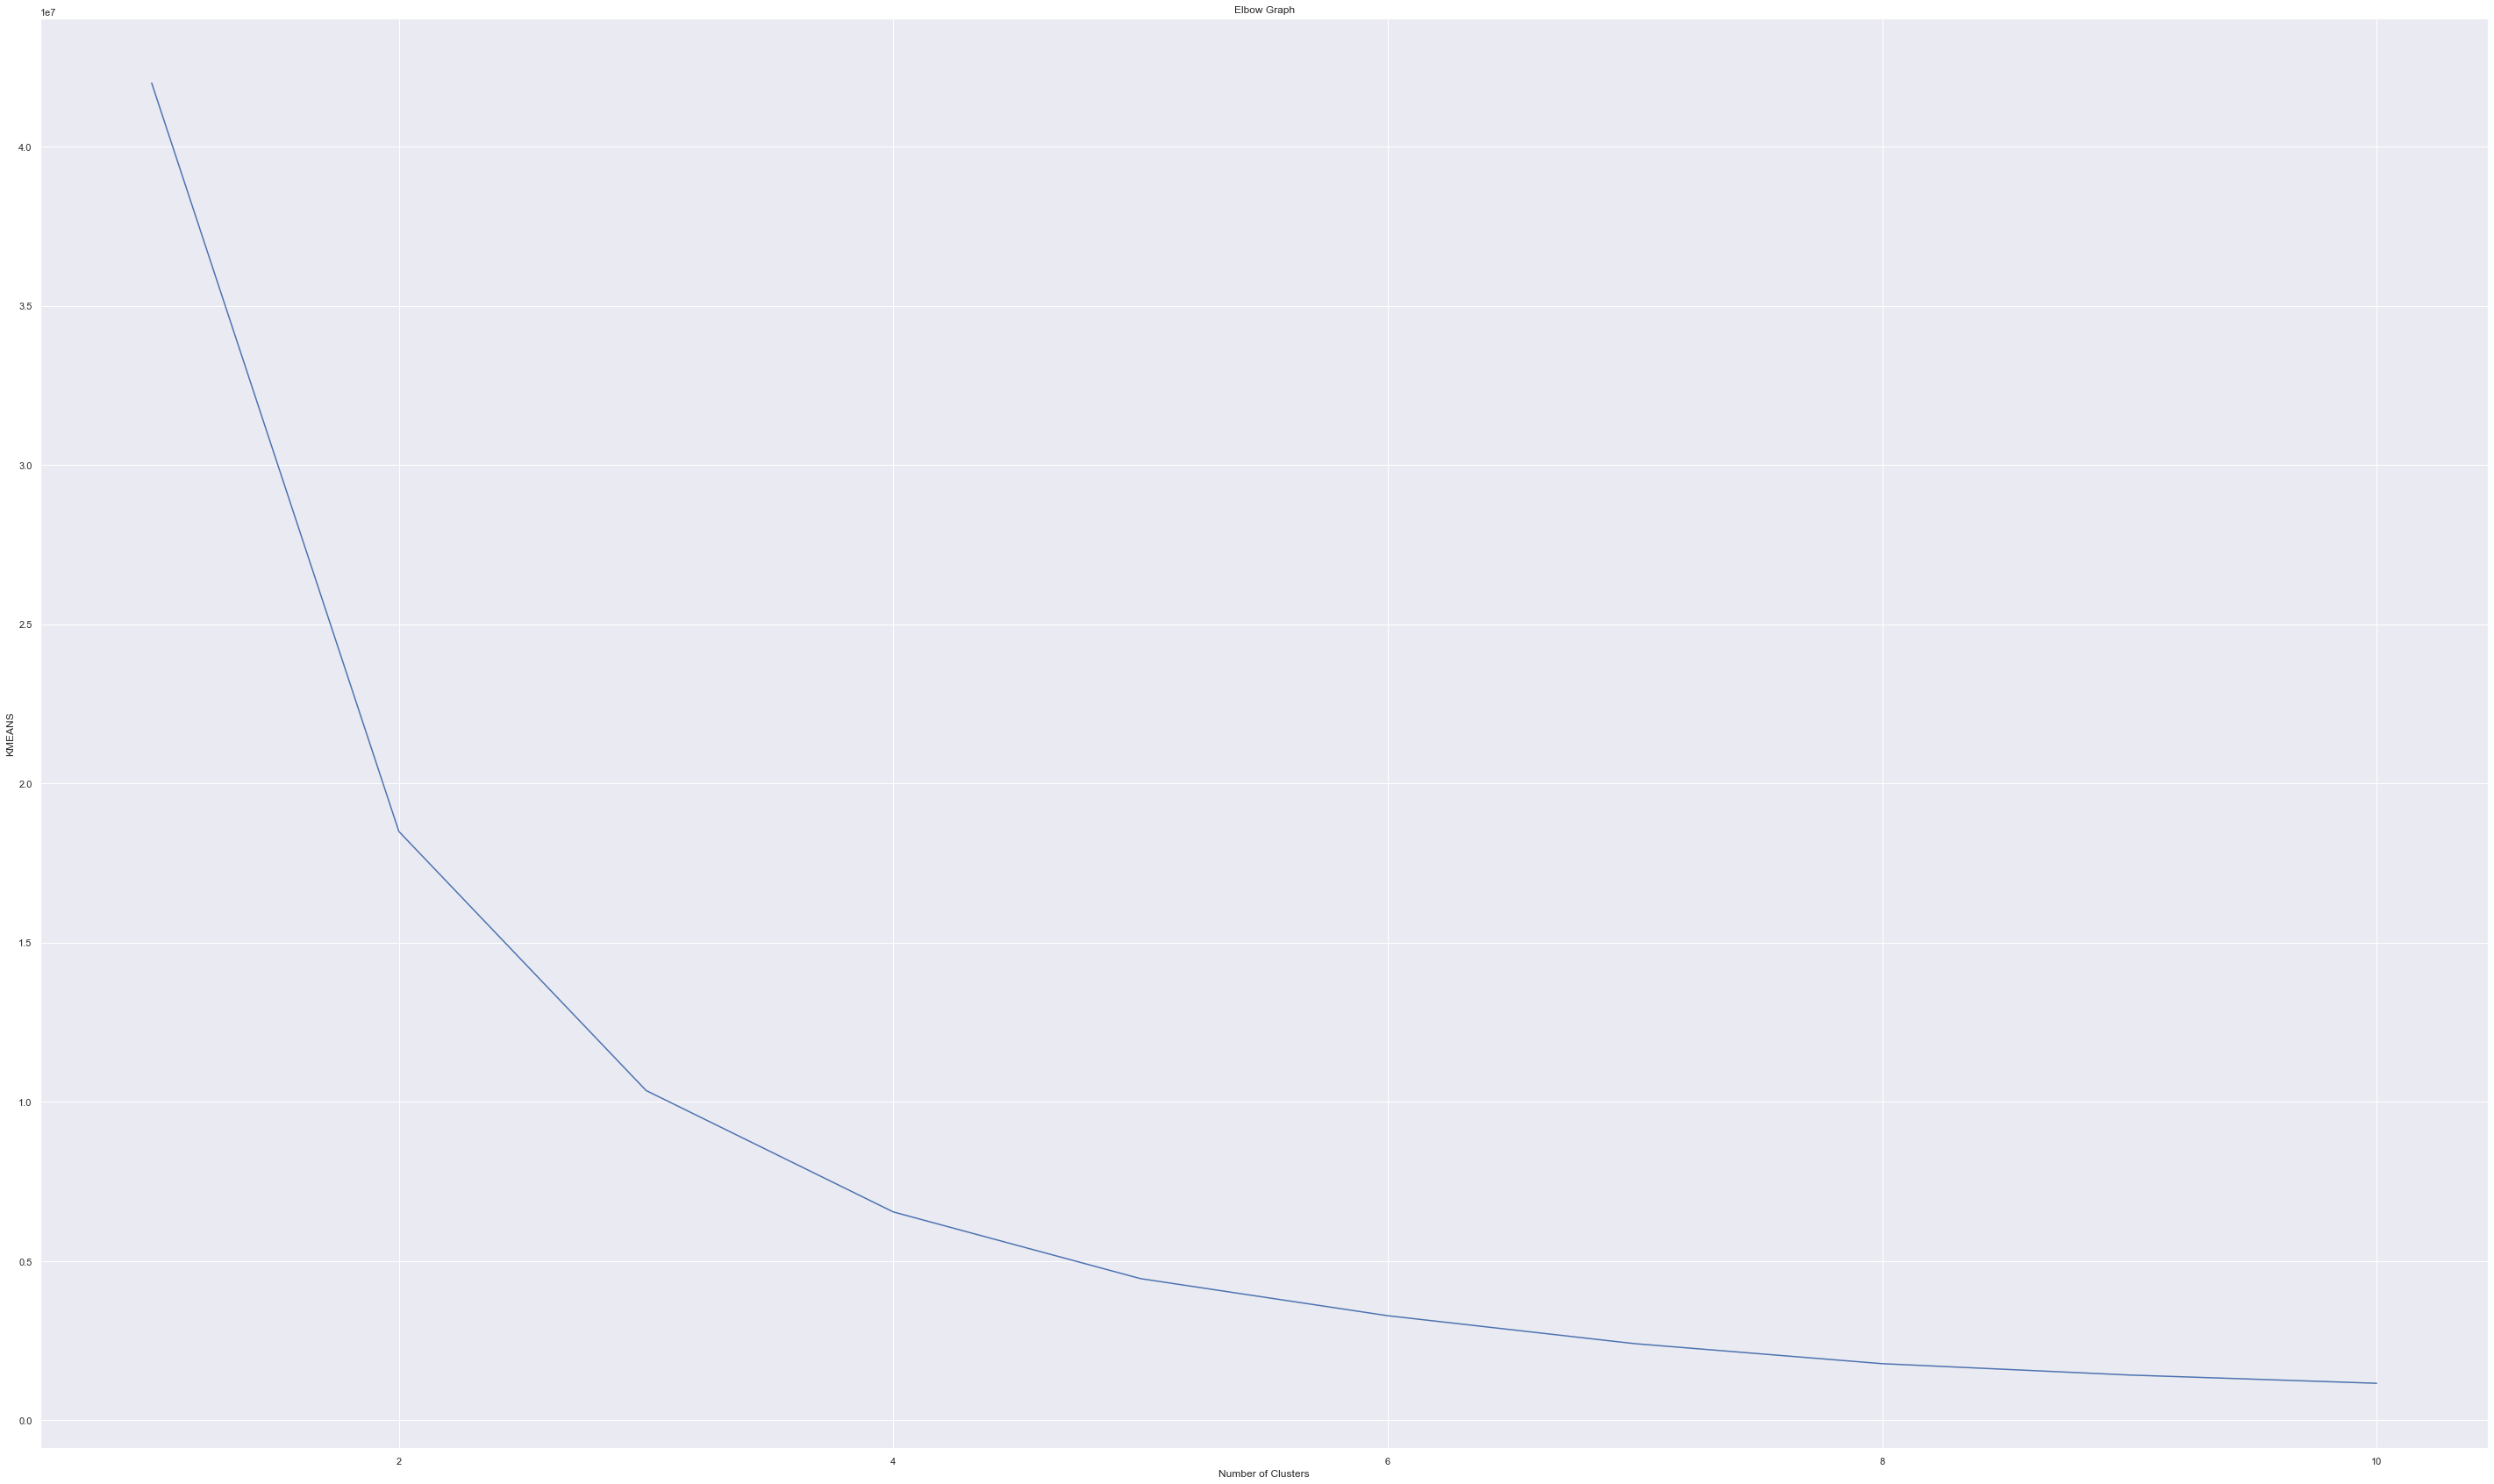

In [102]:
#here we used Elbow graph to identity the how many number of cluster are present and also tells about the k value
sns.set()
plt.plot(range(1,11), KMEANS)
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('KMEANS')
plt.show()

In [93]:
#from the above graph we are considering k as 3 
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
Y = kmeans.fit_predict(x)
print(Y)

[1 1 0 ... 1 1 1]


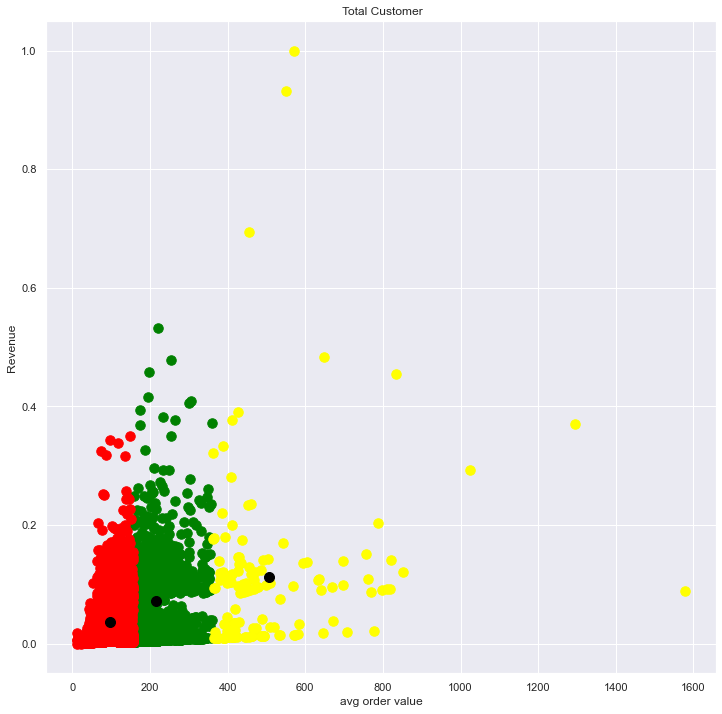

In [96]:
#this graph tells about the average order value vs Revenue
#This graph also tells about the customer behaviour according to its order and revenue
#green->tells about the user whose do less oder and generate less amount of revenue
#yello->tells about the user whose placed lot's of order and generate high level of revenue
plt.figure(figsize=(12,12))
plt.scatter(x[Y==0,0], x[Y==0,1], s=90, c='green', label='Cluster 1')
plt.scatter(x[Y==1,0], x[Y==1,1], s=90, c='red', label='Cluster 2')
plt.scatter(x[Y==2,0], x[Y==2,1], s=90, c='yellow', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')
plt.title(' Total Customer')
plt.xlabel('avg order value')
plt.ylabel('Revenue')
plt.show()

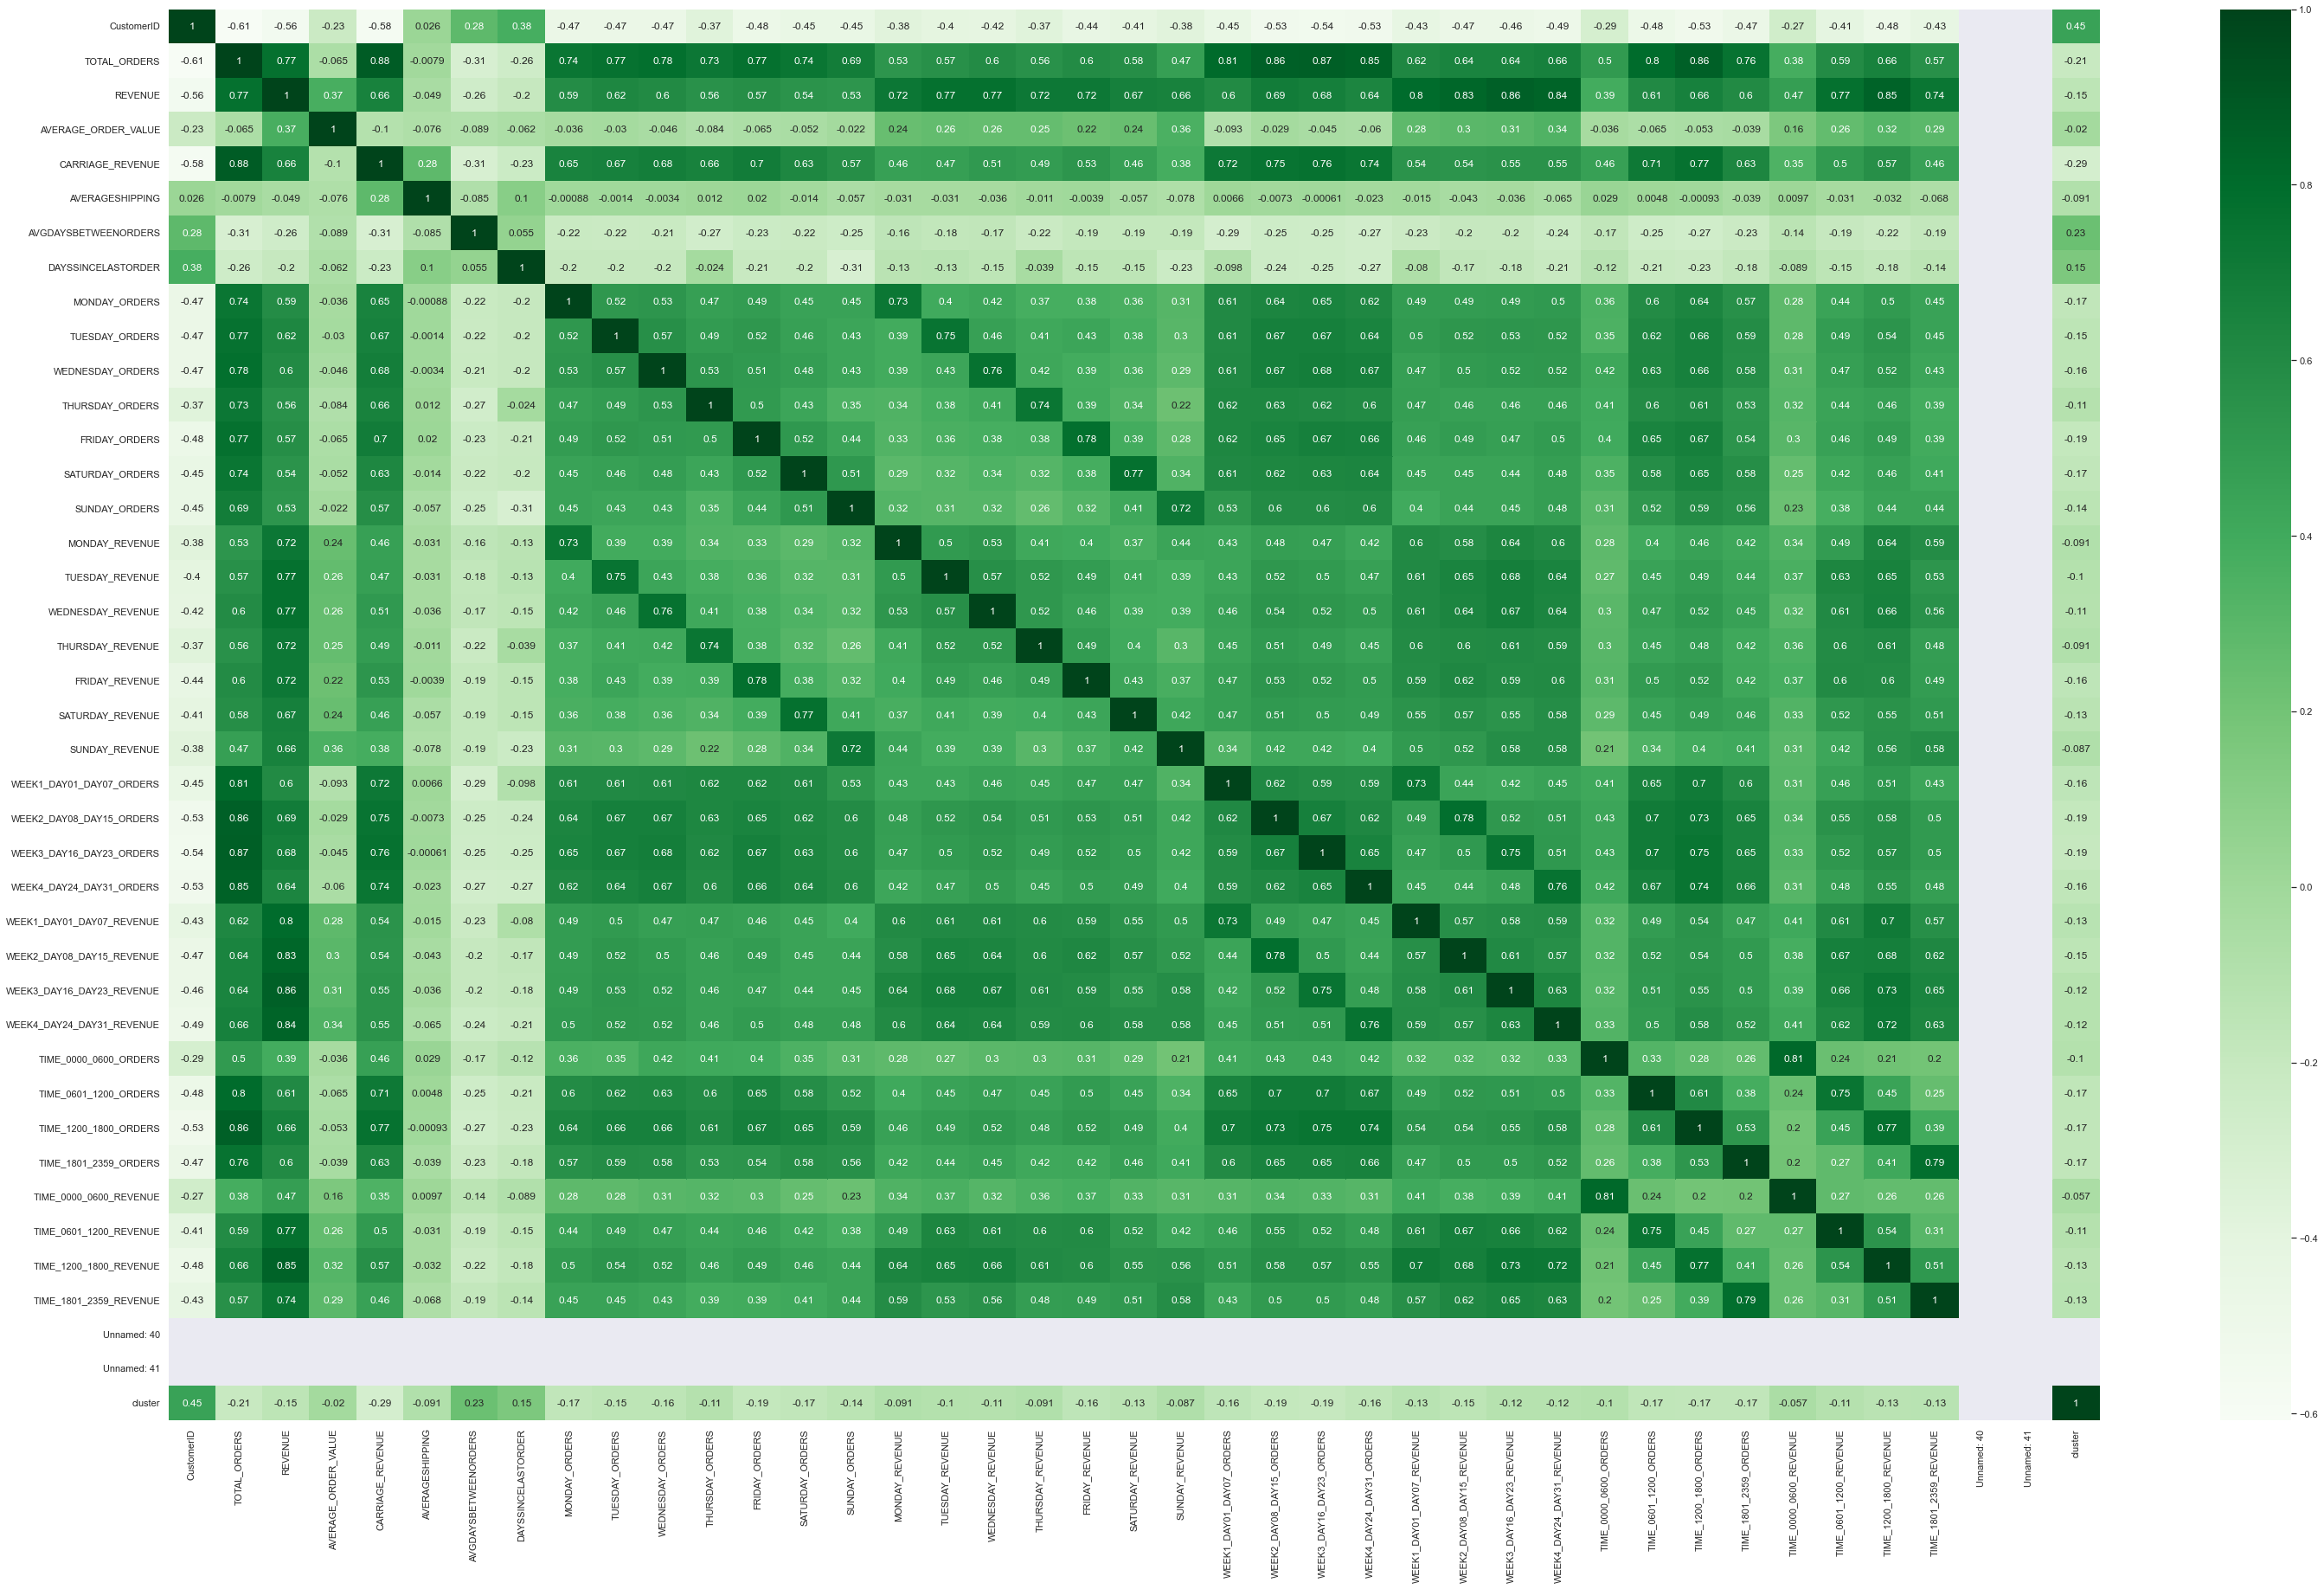

In [97]:
#this graph tells about total distribution of all the attributes in a matrix form
sns.set(rc={"figure.figsize":(50, 30)})
sns.heatmap(data.corr(),annot=True,cmap="Greens")

In [107]:
#from the above graph we can visualise the 3 clusters and the revenue generated by the clusters the cluster 1 is placing more orders 
#we are using min max scaler to transform revenue and total_orders column in the range of 0 to 1 for better segmentation and predection
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data[['REVENUE']])
data['REVENUE'] = scaler.transform(data[['REVENUE']])
scaler.fit(data[['TOTAL_ORDERS']])
data['TOTAL_ORDERS'] = scaler.transform(data[['TOTAL_ORDERS']])

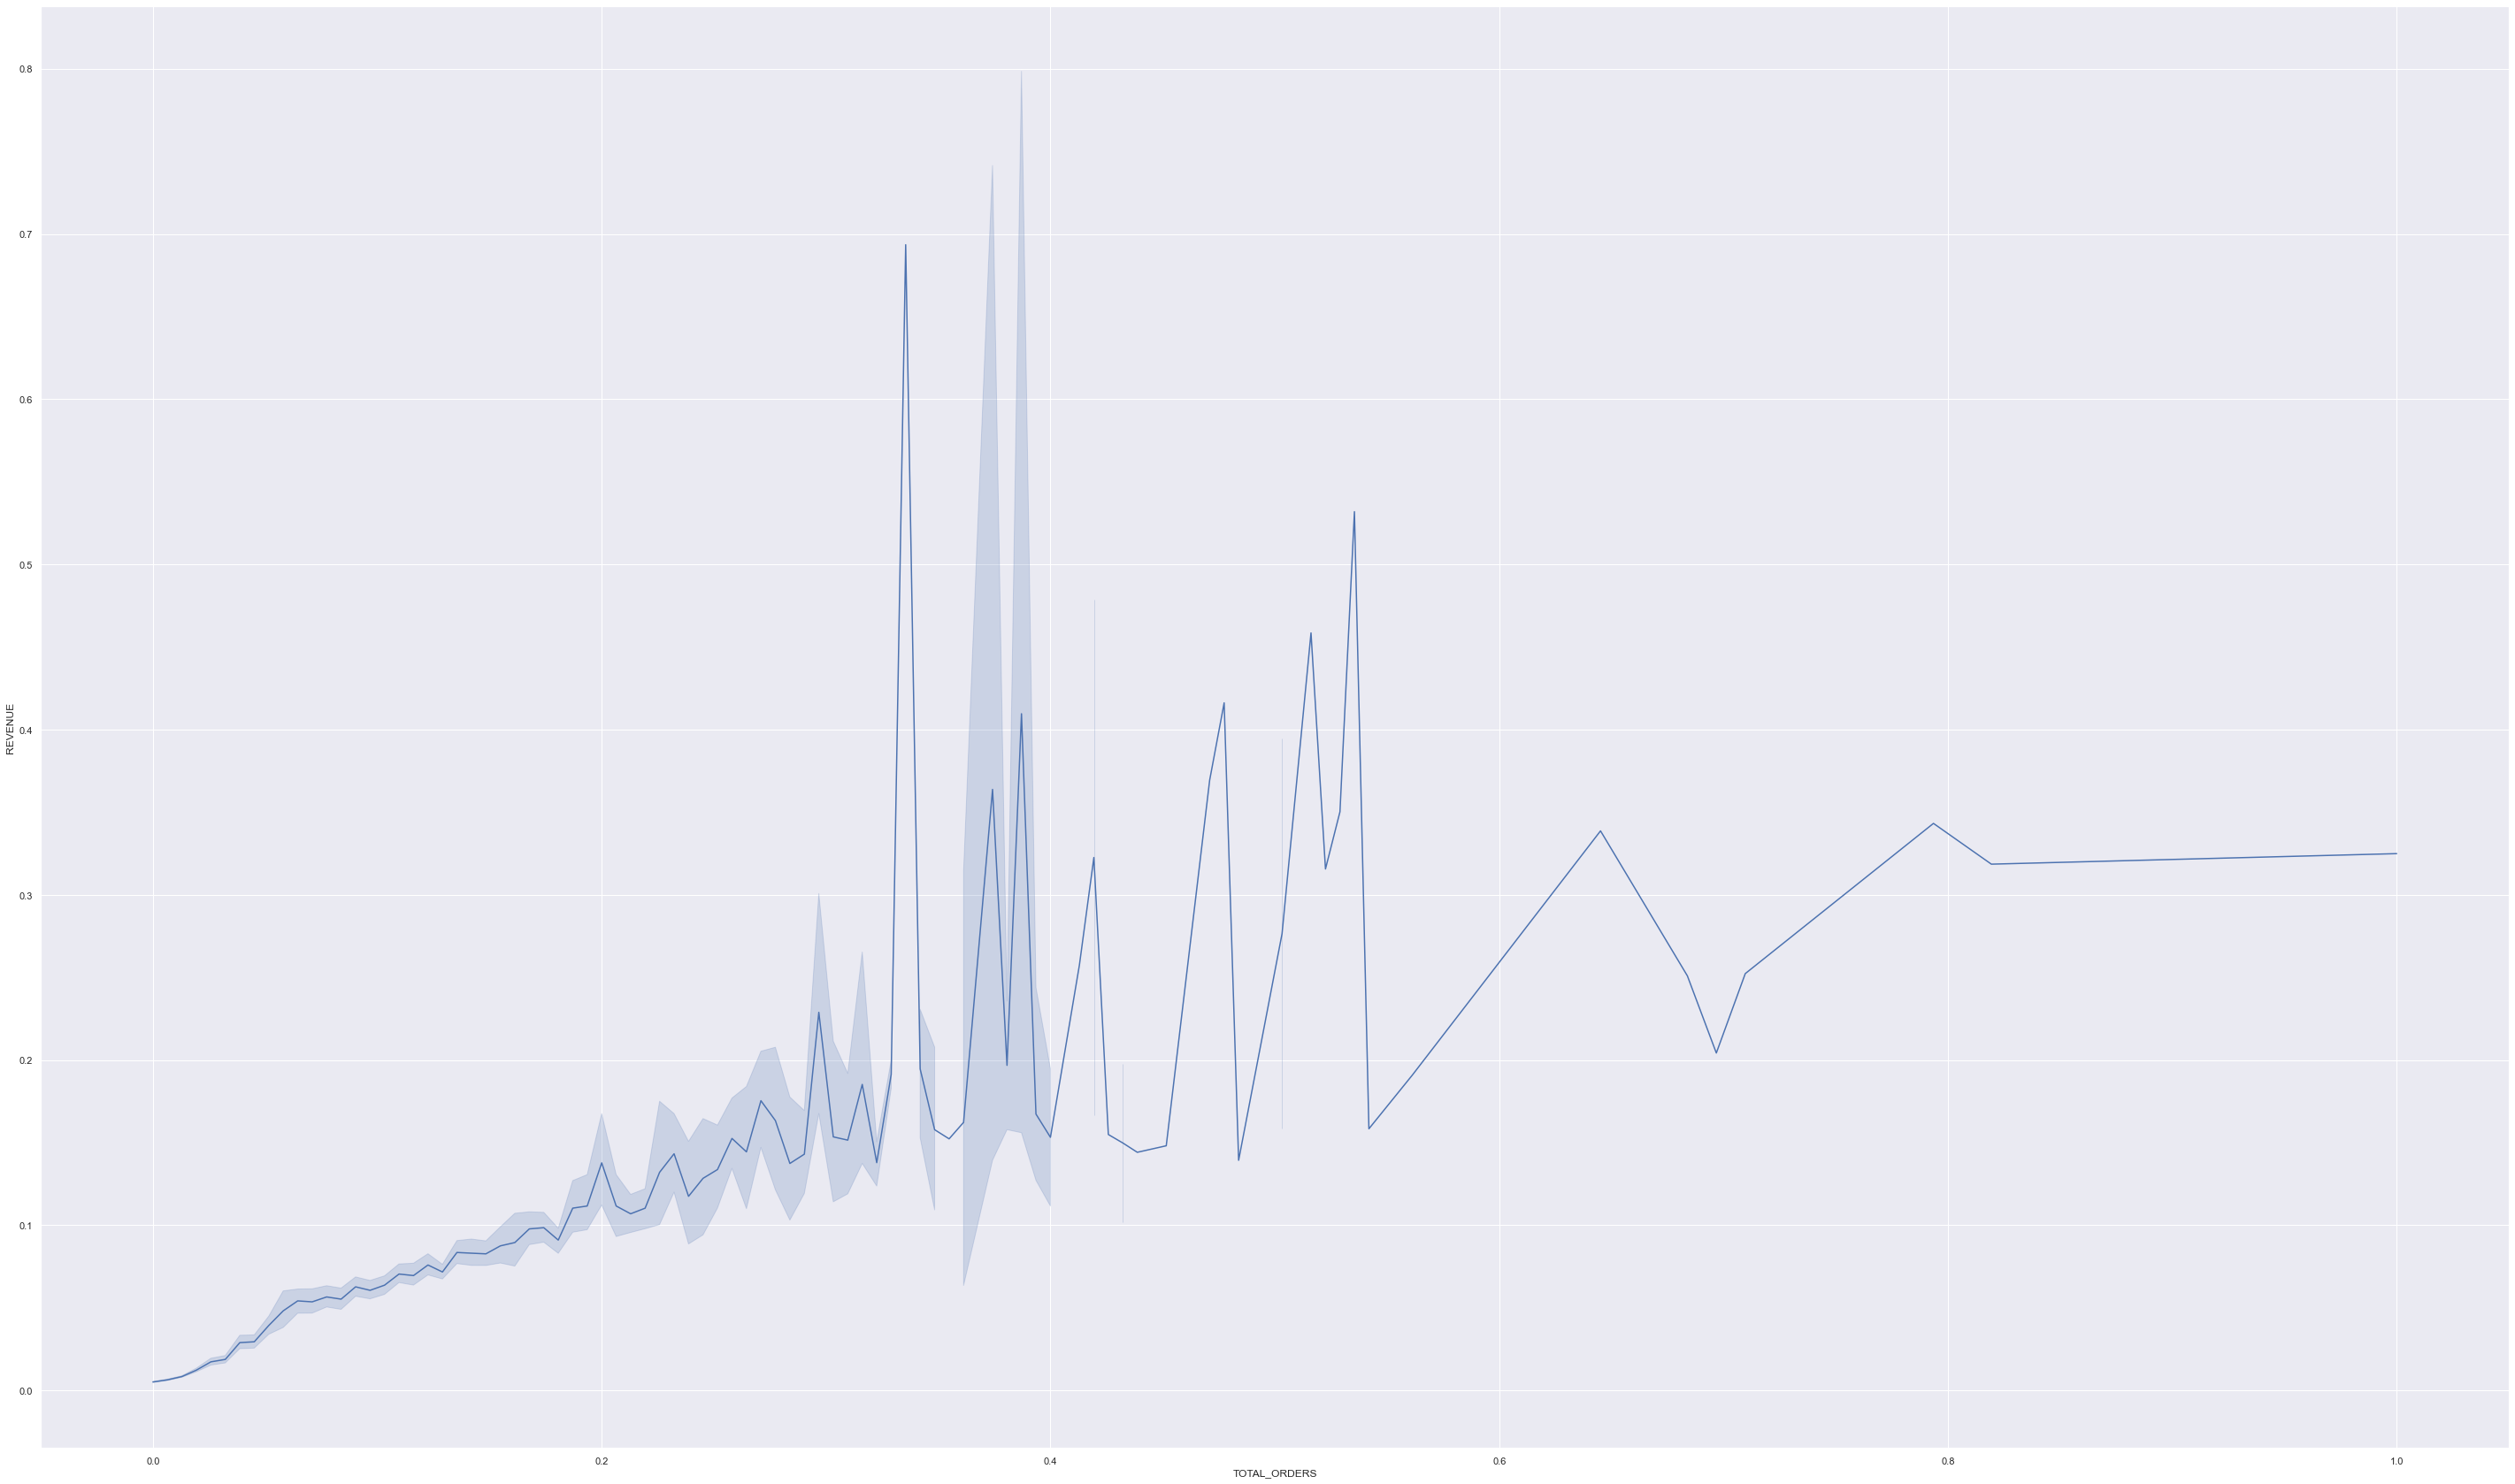

In [111]:
#this graph tells about the Total order vs Revenue
sns.lineplot(data=data,x="TOTAL_ORDERS",y="REVENUE")

In [112]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['TOTAL_ORDERS','REVENUE']])
y_predicted

array([2, 2, 2, ..., 1, 1, 1])

In [113]:
data['cluster']=y_predicted
data.head()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE,Unnamed: 40,Unnamed: 41,cluster
0,22,0.793548,0.343247,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,61,37,14,1067.92,5674.65,3916.53,1327.44,NaN,NaN,2
1,29,0.522581,0.315651,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,13,24,44,30.25,3143.69,2205.47,5646.55,NaN,33340.77,2
2,83,0.270968,0.207452,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,6,12,25,0.00,707.98,2560.91,3990.80,NaN,NaN,2
3,95,0.277419,0.199770,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,10,13,21,0.00,1908.99,2025.05,3058.23,NaN,NaN,2
4,124,0.348387,0.178832,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,9,27,13,501.34,1197.83,3004.77,1559.50,NaN,NaN,2


In [114]:
km.cluster_centers_

array([[0.12960439, 0.07837045],
       [0.0221182 , 0.01397122],
       [0.31026648, 0.19960973]])

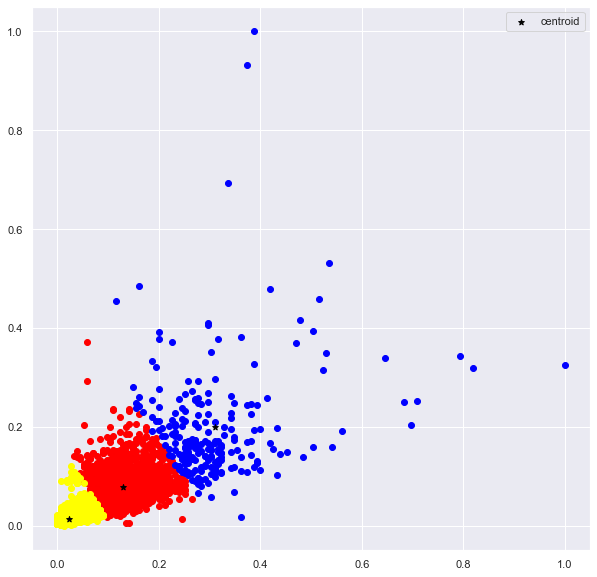

In [119]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]
plt.figure(figsize=(10, 10))
plt.scatter(data1.TOTAL_ORDERS,data1['REVENUE'],color='red')
plt.scatter(data2.TOTAL_ORDERS,data2['REVENUE'],color='yellow')
plt.scatter(data3.TOTAL_ORDERS,data3['REVENUE'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.legend()

In [80]:
# Cluster 0 yellow color => need attention => Spend good money with us often and responsive to promotions.

# Cluster 1 red color=> champions => spent a good amount and bought more than once.

# Cluster 2 blue color=> Potential customer=>buying and ordering high end products and generating more revenue.